In [1]:
# Importing Necessary  Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the dataset
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [12]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [13]:
df.dropna(inplace=True)
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [16]:
#How many unique platforms are present in the data?
df['Platform'].nunique()

31

In [17]:
# Unique Platform
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [18]:
df['Year'].describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

##### The year of release for the earliest and latest is 1980, and 2020.

In [37]:
Earliest = df.loc[(df['Year']==1980)]
Latest = df.loc[(df['Year']==2020)]

In [24]:
Earliest

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
258,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
544,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
4025,4027,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.0,0.01,0.49
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
6317,6319,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,0.27
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24


In [23]:
Latest

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


#### The platform with the earliest release was 2600
#### The platform with the latest release is DS.

In [28]:
# Sales calculation for various regions
x = ['North America','Europe','Japan','Others']
y = [Earliest['NA_Sales'].sum(), Earliest['EU_Sales'].sum(),Earliest['JP_Sales'].sum(),Earliest['Other_Sales'].sum()]
z = [Latest['NA_Sales'].sum(), Latest['EU_Sales'].sum(),Latest['JP_Sales'].sum(),Latest['Other_Sales'].sum()]

<Axes: >

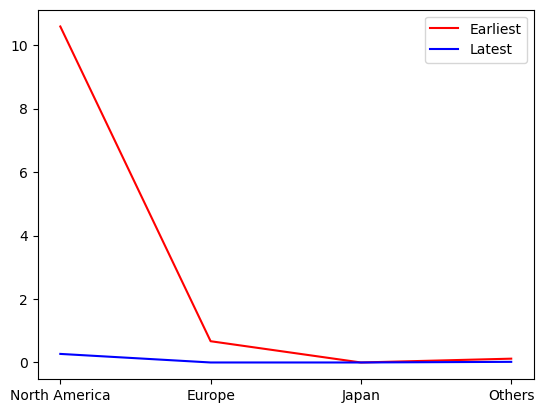

In [101]:
# Plot sales comparison between earliest and latest releases
sns.lineplot(x=x, y=y, color='Red',label='Earliest')
sns.lineplot(x=x, y=z,color='Blue',label='Latest')

#### The Earliest Release had considerable Sales In various Parts Of The World
#### But the Latest Release Did not have a lot of sales compared to the earliest

In [207]:
# most frequent platform
df['Platform'].value_counts()

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

#### Ds Has Most Number of Releases,Followed By PS2.

In [46]:
# Filter data for 'DS' platform
ds = df.loc[(df['Platform']=='DS')]

In [48]:
# Extract unique years for 'DS' platform
years = list(ds['Year'].unique())
years = sorted(years)
years

[1985.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2020.0]

In [51]:
# Initialize dictionaries for sales in each region over years
Final_NA = dict()
Final_EU = dict()
Final_JP = dict()
Final_Other = dict()
Final_Global = dict()


# Iterate over 'DS' data and populate dictionaries with sales values
for i in years:
    Final_NA[i] = list()
    
for i in years:
    Final_EU[i] = list()

for i in years:
    Final_JP[i] = list()

for i in years:
    Final_Other[i] = list()

for i in years:
    Final_Global[i] = list() 

In [62]:
# Calculate sales and store in dictionaries
for i in ds.iterrows():
    year = i[1][3]
    Final_NA[year].insert(0,i[1][6])
    Final_EU[year].insert(0,i[1][7])
    Final_JP[year].insert(0,i[1][8])
    Final_Other[year].insert(0,i[1][9])
    Final_Global[year].insert(0,i[1][10])

In [66]:
Final_NA

{1985.0: [0.0],
 2004.0: [0.03,
  0.0,
  0.04,
  0.0,
  0.06,
  0.0,
  0.0,
  0.1,
  0.08,
  0.13,
  0.14,
  0.1,
  0.0,
  0.13,
  0.24,
  0.17,
  0.27,
  0.4,
  0.41,
  0.31,
  0.21,
  0.52,
  5.08],
 2005.0: [0.01,
  0.02,
  0.01,
  0.02,
  0.02,
  0.01,
  0.02,
  0.02,
  0.0,
  0.01,
  0.03,
  0.03,
  0.0,
  0.04,
  0.0,
  0.0,
  0.04,
  0.05,
  0.05,
  0.05,
  0.05,
  0.05,
  0.0,
  0.06,
  0.06,
  0.06,
  0.06,
  0.07,
  0.06,
  0.07,
  0.03,
  0.07,
  0.07,
  0.07,
  0.08,
  0.05,
  0.08,
  0.09,
  0.09,
  0.07,
  0.0,
  0.09,
  0.0,
  0.0,
  0.0,
  0.08,
  0.1,
  0.08,
  0.07,
  0.1,
  0.09,
  0.1,
  0.11,
  0.11,
  0.11,
  0.11,
  0.0,
  0.11,
  0.12,
  0.12,
  0.11,
  0.0,
  0.0,
  0.12,
  0.0,
  0.15,
  0.14,
  0.14,
  0.13,
  0.14,
  0.1,
  0.0,
  0.11,
  0.14,
  0.16,
  0.15,
  0.17,
  0.15,
  0.0,
  0.19,
  0.0,
  0.0,
  0.15,
  0.21,
  0.21,
  0.21,
  0.16,
  0.24,
  0.15,
  0.3,
  0.25,
  0.25,
  0.32,
  0.3,
  0.34,
  0.3,
  0.13,
  0.37,
  0.41,
  0.14,
  0.0,
  0.26,


In [91]:
# Sum sales for each year

for i in Final_NA.keys():
    Final_NA[i] = sum(Final_NA[i])
for i in Final_EU.keys():
    Final_EU[i] = sum(Final_EU[i])
for i in Final_JP.keys():
    Final_JP[i] = sum(Final_JP[i])
for i in Final_Other.keys():
    Final_Other[i] = sum(Final_Other[i])
for i in Final_Global.keys():
    Final_Global[i] = sum(Final_Global[i])

In [92]:
Final_NA

{1985.0: 0.0,
 2004.0: 8.42,
 2005.0: 48.470000000000006,
 2006.0: 50.63000000000001,
 2007.0: 76.36,
 2008.0: 79.39999999999998,
 2009.0: 62.41000000000001,
 2010.0: 42.36,
 2011.0: 15.29,
 2012.0: 4.18,
 2013.0: 0.7200000000000001,
 2014.0: 0.02,
 2020.0: 0.27}

<Axes: >

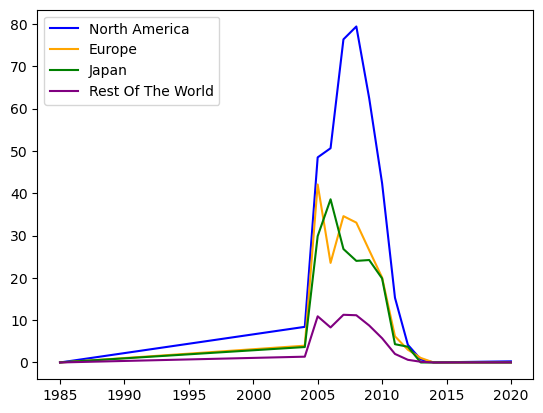

In [98]:
# Plotting sales over years
years= Final_NA.keys()
sns.lineplot(data=Final_NA, color='Blue',label='North America')
sns.lineplot(data=Final_EU, color='Orange',label='Europe')
sns.lineplot(data=Final_JP, color='Green',label='Japan')
sns.lineplot(data=Final_Other, color='Purple',label='Rest Of The World')

In [99]:
# the sales in the North America Surpassed All Other Areas, But Only Saw Considerable Spike During 2004-2014.

<Axes: >

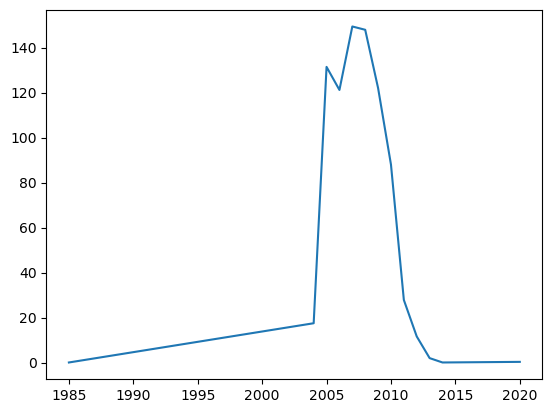

In [100]:
sns.lineplot(data=Final_Global)

In [196]:
#### the sales in the north america surpassed all other areas, but only saw considerable spike during 2004-2014.
#### global sales saw a considerable amount of sales during 2004 to 2014.

In [104]:
# Genre
df['Genre'].value_counts()

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

#### The most number of releases were from the action genre

In [106]:
action = df.loc[(df['Genre']=='Action')]

In [109]:
action

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
...,...,...,...,...,...,...,...,...,...,...,...
16564,16567,Original Frisbee Disc Sports: Ultimate & Golf,DS,2007.0,Action,"Destination Software, Inc",0.01,0.00,0.00,0.00,0.01
16567,16570,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16582,16585,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.00,0.00,0.01
16583,16586,Carmageddon 64,N64,1999.0,Action,Virgin Interactive,0.01,0.00,0.00,0.00,0.01


In [110]:
years = list(action['Year'].unique())
years = sorted(years)
years

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0]

In [112]:
Final_NA = dict()
Final_EU = dict()
Final_JP = dict()
Final_Other = dict()
Final_Global = dict()

for i in years:
    Final_NA[i] = list()
    
for i in years:
    Final_EU[i] = list()

for i in years:
    Final_JP[i] = list()

for i in years:
    Final_Other[i] = list()

for i in years:
    Final_Global[i] = list()

In [114]:
for i in action.iterrows():
    year = i[1][3]
    Final_NA[year].insert(0,i[1][6])
    Final_EU[year].insert(0, i[1][7])
    Final_JP[year].insert(0, i[1][8])
    Final_Other[year].insert(0, i[1][9])
    Final_Global[year].insert(0, i[1][10])
    

In [116]:
for i in Final_NA.keys():
    Final_NA[i] = sum(Final_NA[i])

for i in Final_EU.keys():
    Final_EU[i] = sum(Final_EU[i])

for i in Final_JP.keys():
    Final_JP[i] = sum(Final_JP[i])

for i in Final_Other.keys():
    Final_Other[i] = sum(Final_Other[i])

for i in Final_Global.keys():
    Final_Global[i] = sum(Final_Global[i])

In [120]:
Final_NA

{1980.0: 0.32,
 1981.0: 13.86,
 1982.0: 6.07,
 1983.0: 2.67,
 1984.0: 0.8,
 1985.0: 1.64,
 1986.0: 6.5200000000000005,
 1987.0: 1.04,
 1988.0: 1.1500000000000001,
 1989.0: 3.83,
 1990.0: 4.2700000000000005,
 1991.0: 3.4699999999999998,
 1992.0: 2.21,
 1993.0: 0.64,
 1994.0: 0.57,
 1995.0: 1.73,
 1996.0: 10.650000000000002,
 1997.0: 14.400000000000002,
 1998.0: 20.15,
 1999.0: 14.91,
 2000.0: 17.79,
 2001.0: 29.809999999999995,
 2002.0: 47.81,
 2003.0: 37.74000000000001,
 2004.0: 39.08,
 2005.0: 49.61999999999999,
 2006.0: 38.370000000000005,
 2007.0: 58.89999999999999,
 2008.0: 72.39,
 2009.0: 71.61,
 2010.0: 60.320000000000036,
 2011.0: 53.73,
 2012.0: 52.480000000000004,
 2013.0: 53.78999999999999,
 2014.0: 38.72999999999999,
 2015.0: 22.830000000000002,
 2016.0: 5.870000000000001,
 2017.0: 0.0}

<Axes: >

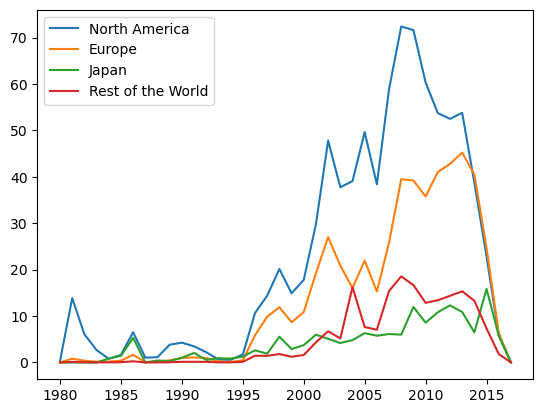

In [121]:
sns.lineplot(Final_NA, label="North America")
sns.lineplot(Final_EU, label="Europe")
sns.lineplot(Final_JP, label="Japan")
sns.lineplot(Final_Other, label='Rest of the World')

<Axes: >

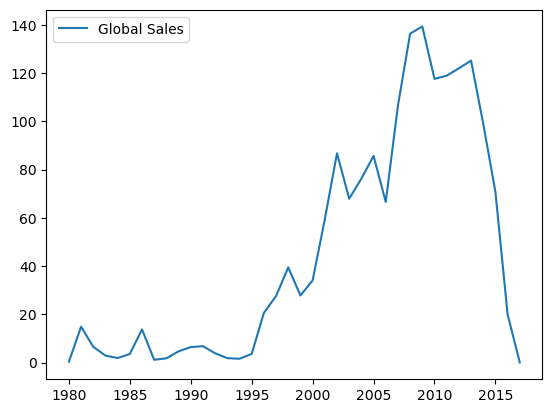

In [133]:
sns.lineplot(Final_Global, label='Global Sales')

#### the initial spike was seen in north america for action genre
#### although japan saw an equal spike w.r.t north america in the mid 80s, they didn't get as much spike after the late 90s.
#### the Europe sales picked up after mid 90s, and saw a considerable rise in the later years for action genre.

In [198]:
# Publisher
df['Publisher'].value_counts()

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: count, Length: 576, dtype: int64

#### the most frequent publisher is Electronic Arts, let's analyze their sales over the years.

In [125]:
EA = df.loc[(df['Publisher'] == 'Electronic Arts')]

In [126]:
years = list(EA['Year'].unique())
years = sorted(years)

In [127]:
EA_Final_NA = dict()
EA_Final_EU = dict()
EA_Final_JP = dict()
EA_Final_Other = dict()
EA_Final_Global = dict()

for i in years:
    EA_Final_NA[i] = list()

for i in years:
    EA_Final_EU[i] = list()

for i in years:
    EA_Final_JP[i] = list()

for i in years:
    EA_Final_Other[i] = list()

for i in years:
    EA_Final_Global[i] = list()

In [128]:
for i in EA.iterrows():
    year = i[1][3]
    EA_Final_NA[year].insert(0, i[1][6])
    EA_Final_EU[year].insert(0, i[1][7])
    EA_Final_JP[year].insert(0, i[1][8])
    EA_Final_Other[year].insert(0, i[1][9])
    EA_Final_Global[year].insert(0, i[1][10])

In [129]:
for i in EA_Final_NA.keys():
    EA_Final_NA[i] = sum(EA_Final_NA[i])

for i in EA_Final_EU.keys():
    EA_Final_EU[i] = sum(EA_Final_EU[i])

for i in EA_Final_JP.keys():
    EA_Final_JP[i] = sum(EA_Final_JP[i])

for i in EA_Final_Other.keys():
    EA_Final_Other[i] = sum(EA_Final_Other[i])

for i in EA_Final_Global.keys():
    EA_Final_Global[i] = sum(EA_Final_Global[i])

<Axes: >

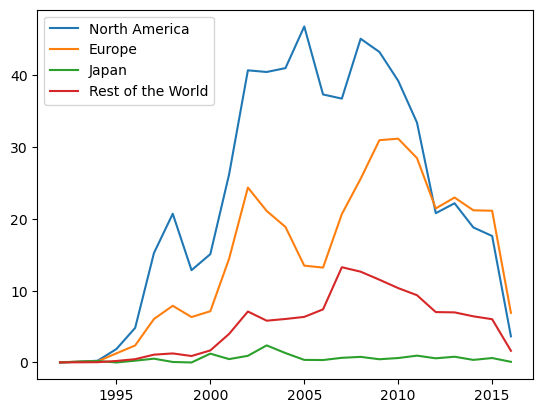

In [130]:
sns.lineplot(EA_Final_NA, label="North America")
sns.lineplot(EA_Final_EU, label="Europe")
sns.lineplot(EA_Final_JP, label="Japan")
sns.lineplot(EA_Final_Other, label='Rest of the World')

<Axes: >

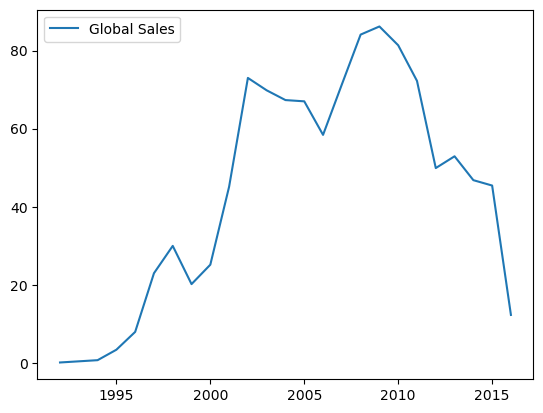

In [132]:
sns.lineplot(EA_Final_Global, label='Global Sales')

#### EA sales in north america saw a great rise during 2000s.
#### Japan saw the least sales during the years.
#### although, all areas saw a sharp decline after 2013-2014.
#### global sales saw a rise during 2000s, and saw a decline nearing 2015.

In [199]:
# Year
df['Year'].value_counts()

Year
2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64

In [200]:
years = list(df['Year'].unique())
years = sorted(years)
years

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2020.0]

In [137]:
Y_Final_NA = dict()
Y_Final_EU = dict()
Y_Final_JP = dict()
Y_Final_Other = dict()
Y_Final_Global = dict()

for i in years:
    Y_Final_NA[i] = list()

for i in years:
    Y_Final_EU[i] = list()

for i in years:
    Y_Final_JP[i] = list()

for i in years:
    Y_Final_Other[i] = list()

for i in years:
    Y_Final_Global[i] = list()

In [139]:
for i in df.iterrows():
    year = i[1][3]
    Y_Final_NA[year].insert(0, i[1][6])
    Y_Final_EU[year].insert(0, i[1][7])
    Y_Final_JP[year].insert(0, i[1][8])
    Y_Final_Other[year].insert(0, i[1][9])
    Y_Final_Global[year].insert(0, i[1][10])

In [140]:
for i in Y_Final_NA.keys():
    Y_Final_NA[i] = sum(Y_Final_NA[i])

for i in Y_Final_EU.keys():
    Y_Final_EU[i] = sum(Y_Final_EU[i])

for i in Y_Final_JP.keys():
    Y_Final_JP[i] = sum(Y_Final_JP[i])

for i in Y_Final_Other.keys():
    Y_Final_Other[i] = sum(Y_Final_Other[i])

for i in Y_Final_Global.keys():
    Y_Final_Global[i] = sum(Y_Final_Global[i])

In [141]:
Y_Final_NA

{1980.0: 10.59,
 1981.0: 33.4,
 1982.0: 26.92,
 1983.0: 7.76,
 1984.0: 33.28,
 1985.0: 33.73,
 1986.0: 12.500000000000002,
 1987.0: 8.459999999999999,
 1988.0: 23.869999999999997,
 1989.0: 45.150000000000006,
 1990.0: 25.46,
 1991.0: 12.76,
 1992.0: 33.86999999999999,
 1993.0: 15.12,
 1994.0: 28.15,
 1995.0: 24.820000000000004,
 1996.0: 86.75999999999998,
 1997.0: 94.74999999999999,
 1998.0: 128.36,
 1999.0: 126.06000000000003,
 2000.0: 94.49000000000002,
 2001.0: 173.98,
 2002.0: 216.18999999999997,
 2003.0: 193.5899999999999,
 2004.0: 218.80000000000004,
 2005.0: 241.57999999999993,
 2006.0: 263.1199999999999,
 2007.0: 311.1799999999999,
 2008.0: 351.4399999999999,
 2009.0: 338.84999999999985,
 2010.0: 304.24000000000007,
 2011.0: 241.0,
 2012.0: 154.93,
 2013.0: 154.76999999999995,
 2014.0: 131.97,
 2015.0: 102.81999999999996,
 2016.0: 22.66,
 2017.0: 0.0,
 2020.0: 0.27}

<Axes: >

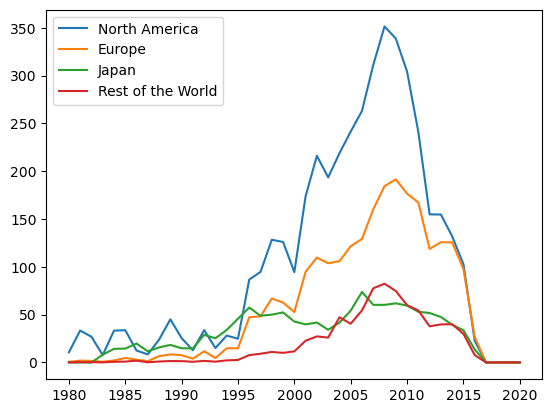

In [142]:
sns.lineplot(Y_Final_NA, label="North America")
sns.lineplot(Y_Final_EU, label="Europe")
sns.lineplot(Y_Final_JP, label="Japan")
sns.lineplot(Y_Final_Other, label='Rest of the World')

<Axes: >

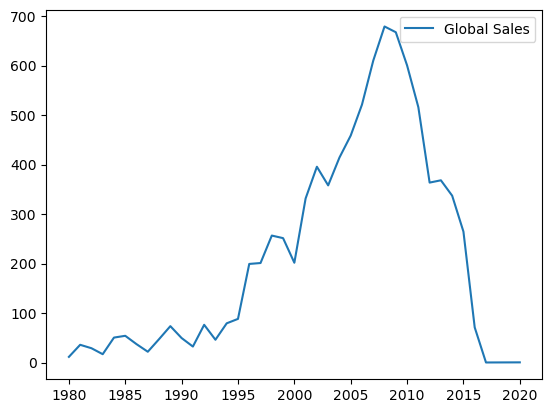

In [143]:
sns.lineplot(Y_Final_Global, label='Global Sales')

#### the most fruitful years were 2000-2015 for north america, and the highest
#### the most fruitful years for europe was also 2000-2010, saw a decline after that.
#### the japan sales had been consistent over the years, no sudden rise, but took off after 1995.
#### rest of the world saw a good rise fter 2005, and declined after 2015.
#### global sales took off after 1995, and saw a great increase from 2005-2010.
#### started sloping down after 2013-2014

In [144]:
#Year Wise Top selling and least selling games
top_selling = dict()
least_selling = dict()

In [147]:
for i in years:
    top_selling[i] = list()
for i in years:
    least_selling[i] = list()

In [151]:
for i in years:
    x= df.loc[df['Year']== i]
    res = x['Name'].loc[x['Global_Sales']==x['Global_Sales'].max()]
    top_selling[i].insert(0,res.values[0])

In [154]:
top_selling

{1980.0: ['Asteroids'],
 1981.0: ['Pitfall!'],
 1982.0: ['Pac-Man'],
 1983.0: ['Baseball'],
 1984.0: ['Duck Hunt'],
 1985.0: ['Super Mario Bros.'],
 1986.0: ['The Legend of Zelda'],
 1987.0: ['Zelda II: The Adventure of Link'],
 1988.0: ['Super Mario Bros. 3'],
 1989.0: ['Tetris'],
 1990.0: ['Super Mario World'],
 1991.0: ['The Legend of Zelda: A Link to the Past'],
 1992.0: ['Super Mario Land 2: 6 Golden Coins'],
 1993.0: ['Super Mario All-Stars'],
 1994.0: ['Donkey Kong Country'],
 1995.0: ["Donkey Kong Country 2: Diddy's Kong Quest"],
 1996.0: ['Pokemon Red/Pokemon Blue'],
 1997.0: ['Gran Turismo'],
 1998.0: ['Pokémon Yellow: Special Pikachu Edition'],
 1999.0: ['Pokemon Gold/Pokemon Silver'],
 2000.0: ['Pokémon Crystal Version'],
 2001.0: ['Gran Turismo 3: A-Spec'],
 2002.0: ['Grand Theft Auto: Vice City'],
 2003.0: ['Need for Speed Underground'],
 2004.0: ['Grand Theft Auto: San Andreas'],
 2005.0: ['Nintendogs'],
 2006.0: ['Wii Sports'],
 2007.0: ['Wii Fit'],
 2008.0: ['Mario Kar

In [157]:
for i in years:
    x = df.loc[df['Year'] == i]
    res = x['Name'].loc[x['Global_Sales'] == x['Global_Sales'].min()]
    least_selling[i].insert(0,res.values[0])

In [160]:
least_selling

{1980.0: ['Checkers'],
 1981.0: ['RealSports Volleyball'],
 1982.0: ['Krull'],
 1983.0: ["Mr. Do!'s Castle"],
 1984.0: ['Beamrider'],
 1985.0: ['Strongest Tokyo University Shogi DS'],
 1986.0: ['RealSports Boxing'],
 1987.0: ['Super Baseball'],
 1988.0: ['SimCity'],
 1989.0: ['Adventures of Lolo'],
 1990.0: ["Famista '91"],
 1991.0: ['Lagoon'],
 1992.0: ['Empire Deluxe'],
 1993.0: ["Rock N' Roll Racing"],
 1994.0: ['Mortal Kombat'],
 1995.0: ['Psychic Detective'],
 1996.0: ['Victory Spike'],
 1997.0: ['Grand Prix Legends'],
 1998.0: ['Pharaoh'],
 1999.0: ['Vanark'],
 2000.0: ['Deus Ex'],
 2001.0: ['IL-2 Sturmovik'],
 2002.0: ['Unreal Tournament 2003'],
 2003.0: ['Blackthorne'],
 2004.0: ['Ten Pin Alley 2'],
 2005.0: ['Serious Sam II'],
 2006.0: ['Chameleon: To Dye For!'],
 2007.0: ['Dragon Zakura DS'],
 2008.0: ['Turok'],
 2009.0: ['Shinseiki Evangelion: Battle Orchestra Portable'],
 2010.0: ['Sora no Otoshimono: DokiDoki Summer Vacation'],
 2011.0: ['DokuSui: DokiDoki Suikoden'],
 201

(array([1.6212e+04, 5.4000e+01, 1.5000e+01, 6.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  4.149,  8.298, 12.447, 16.596, 20.745, 24.894, 29.043,
        33.192, 37.341, 41.49 ]),
 <BarContainer object of 10 artists>)

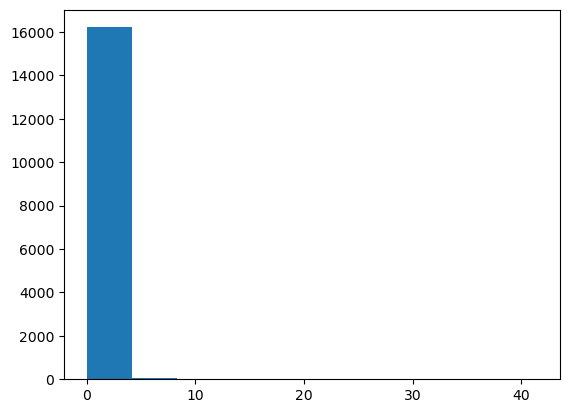

In [161]:
plt.hist(df['NA_Sales'])

<Axes: ylabel='NA_Sales'>

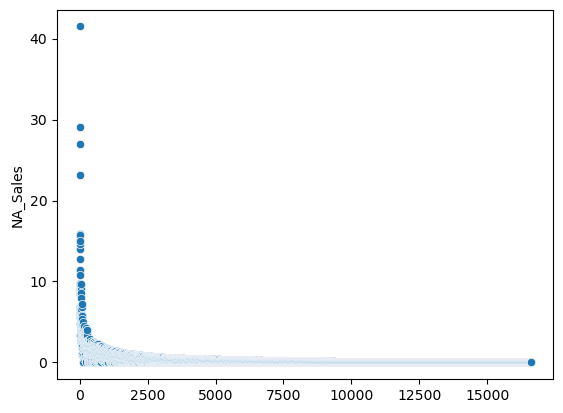

In [163]:
sns.scatterplot(df['NA_Sales'])

In [164]:
df['NA_Sales'].describe()

count    16291.000000
mean         0.265647
std          0.822432
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64

In [166]:
#highest North America Sales
df.loc[df['NA_Sales']==41.490000]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


#### wii sport has highest sales in North America

In [176]:
#More Than average North America Sales
df.loc[df['NA_Sales'] > 0.26]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
6080,6082,I Spy: Spooky Mansion,Wii,2010.0,Puzzle,Storm City Games,0.27,0.00,0.00,0.02,0.29
6083,6085,Wappy Dog,DS,2011.0,Simulation,Activision,0.27,0.00,0.00,0.02,0.29
6147,6149,Triple Play 2000,N64,1999.0,Sports,Electronic Arts,0.27,0.01,0.00,0.00,0.28
6171,6173,Remington Super Slam Hunting: Africa,Wii,2010.0,Sports,Mastiff,0.27,0.00,0.00,0.02,0.28


<Axes: ylabel='EU_Sales'>

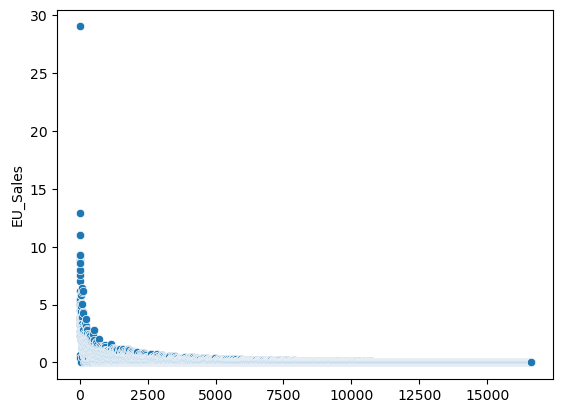

In [177]:
sns.scatterplot(df['EU_Sales'])

In [202]:
#highest Europe Sales
df.loc[df['EU_Sales']==df['EU_Sales'].max()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [203]:
#more than average sales in Europe
df.loc[df['EU_Sales'] > df['EU_Sales'].mean()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
8209,8211,Ashes Cricket 2009,PS3,2009.0,Sports,Codemasters,0.00,0.16,0.00,0.02,0.17
8324,8326,Buzz! Brain of the UK,PS3,2009.0,Misc,Sony Computer Entertainment,0.00,0.15,0.00,0.02,0.17
8402,8404,I'm A Celebrity: Get Me Out of Here!,Wii,2009.0,Misc,Mindscape,0.00,0.16,0.00,0.01,0.17
8594,8596,Take A Break's: Puzzle Master,DS,2009.0,Puzzle,Ubisoft,0.00,0.15,0.00,0.01,0.16


<Axes: ylabel='JP_Sales'>

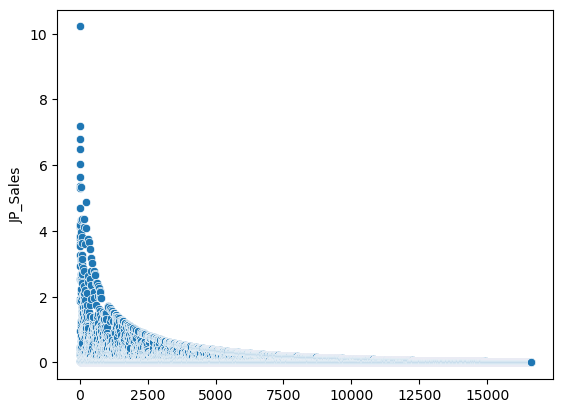

In [181]:
sns.scatterplot(df['JP_Sales'])

In [183]:
#highest selling in Japan
df.loc[df['JP_Sales'] == df['JP_Sales'].max()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


In [204]:
#more than average selling in japan
df.loc[df['JP_Sales'] > df['JP_Sales'].mean()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
11717,11719,The Idolmaster: Gravure For You! Vol. 3,PS3,2011.0,Misc,Namco Bandai Games,0.00,0.00,0.08,0.00,0.08
11728,11730,Tennis no Oji-Sama Gyutto! DokiDoki Survival -...,DS,2011.0,Sports,Konami Digital Entertainment,0.00,0.00,0.08,0.00,0.08
11729,11731,Nicola Kanshuu: Model Oshare * Audition Platina,3DS,2012.0,Action,Alchemist,0.00,0.00,0.08,0.00,0.08
11732,11734,Fairy Tail: Portable Guild 2,PSP,2011.0,Fighting,Konami Digital Entertainment,0.00,0.00,0.08,0.00,0.08


<Axes: ylabel='Other_Sales'>

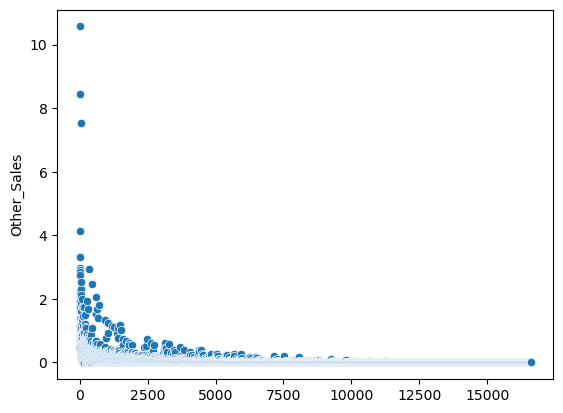

In [188]:
sns.scatterplot(df['Other_Sales'])

In [191]:
#highest selling in Rest Of The World
df.loc[df['Other_Sales'] == df['Other_Sales'].max()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.4,0.41,10.57,20.81


<Axes: ylabel='Global_Sales'>

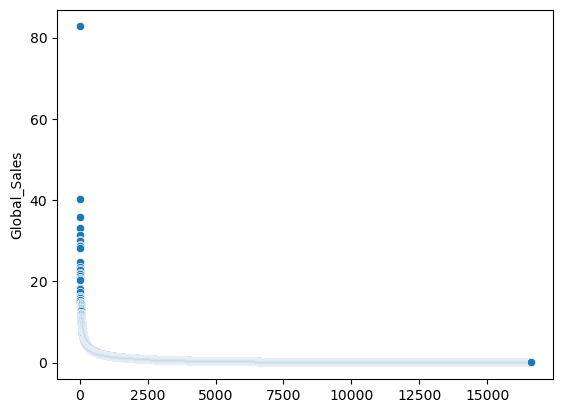

In [193]:
sns.scatterplot(df['Global_Sales'])

In [206]:
#highest selling in Global Sales
df.loc[df['Global_Sales'] == df['Global_Sales'].max()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


#### wii sport has highest sales  Globally

In [195]:
df.loc[df['Global_Sales'] > df['Global_Sales'].mean()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
3682,3684,Are You Smarter than a 5th Grader? Make the Grade,Wii,2008.0,Misc,THQ,0.51,0.00,0.00,0.04,0.55
3683,3685,American Idol,PS2,2003.0,Misc,Codemasters,0.27,0.21,0.00,0.07,0.55
3684,3686,Top Gun: Fire at Will!,PS,1996.0,Misc,Microprose,0.30,0.21,0.00,0.04,0.55
3685,3687,Red Dead Revolver,XB,2004.0,Shooter,Take-Two Interactive,0.40,0.12,0.00,0.02,0.55
